# Guided Project - Linear Regression
ACM AI Beginner Track - Workshop 7

---
Feedback Form: https://bit.ly/btrack-w22-feedback

Discord: https://bit.ly/ACMdiscord

In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

In [ ]:
# set the random seed
np.random.seed(0)

# $$\textbf{Function to be learned - a line}$$
### $$f(x)=\pi x + 10$$

In [ ]:
def f(x):
  return np.pi*x + 10

In [ ]:
def f_with_noise(x):
  return f(x) + np.random.normal(0, 20, size=x.shape)

In [ ]:
# generate 100 data from [0, 100) for X
X = np.arange(0, 100)
y = f_with_noise(X)

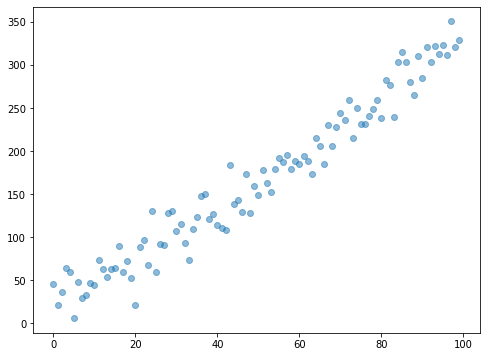

In [ ]:
# plot
plt.figure(figsize=[8, 6])
plt.scatter(X, y, alpha=0.5)

In [ ]:
# Reshape X into (N, 1)
X = X.reshape(-1, 1)

In [ ]:
# shape
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (100, 1)
Shape of y: (100,)


In [ ]:
# split training and test data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Refresher on Classes in Python
`__init__` is the constructor of the class `Rectangle`. It is called when an object of the class `Rectangle` is created. 

`self.b` and `self.h` are attributes of `Rectangle`. This makes sense because every `Rectangle` object should have a base and a height.

Lastly, `area` is a method of `Rectangle`. A method is very similar to a function except you invoke a method on a object using the dot notation in Python. E.g. `my_rect.area()` would invoke the `area` method on the `my_rect` object.

In [ ]:
class Rectangle: 
  def __init__(self, b, h): 
      self.b = b 
      self.h = h

  def area(self): 
      return self.b*self.h

In [ ]:
my_rect = Rectangle(3, 5) 
print("Area: ", my_rect.area())

Area:  15


# Brief Review of Linear Regression
N: number of samples \\
f: number of features \\
X: data; shape = (N, f) \\
y: labels/targets; shape = (N, ) \\
W: weights; shape = (f, ) \\
b: bias; scalar \\
a: learning rate; scalar \\

## $$\textbf{Loss function - MSE}$$
### $$L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} \big(y_i-\hat{y_i}\big)^2 $$
\\
## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$
\\
## $$\textbf{Gradient Descent - update W, b accordingly}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:
# Linear Regression Class
class Linear_Regression():
  """
  Ordinary least squares Linear Regression.

  Linear_Regression fits a linear model with coefficients w = (w1, ..., wf)
  to minimize the residual sum of squares between the observed targets in
  the dataset, and the targets predicted by the linear approximation.

  Parameters:
    num_epochs - number of epochs
    lr - learning rate
    verbose - creates a plot if set to True

  Attributes:
    epochs - number of epochs
    alpha - learning rate
    verbose - creates a plot when fitting train data if set to True
    weights - numpy.ndarray with shape (f, )
    bias - float
    loss_history - list containing the loss of each epoch
  """
  def __init__(self, num_epochs=50, lr=0.00002, verbose=False):
    """
    Initializes a linear regression model.
    
    Parameters:
      num_epochs - number of epochs: int
      lr - learning rate: float
      verbose - verbose: boolean
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose
  
  def predict(self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    # TO DO: implement predict (using our hypothesis) - 1 line
    predictions = X @ self.weights + self.bias
    return predictions

  def loss(self, y, y_hat):
    """
    Computes the Mean Squared Error (MSE) of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      loss - float
    """
    # TO DO: compute loss (MSE) - 1 line
    mse_calc = np.average((y - y_hat)**2)
    return mse_calc

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect the weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    # TO DO: compute gradients - 2 lines
    dw = (2/n)*(X.T @ (y_hat - y))
    db = (2/n)*np.sum(y_hat - y)
    return dw, db

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns:
      a reference to self
    """
    # initialize weights and bias
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand()
    self.loss_history = []

    # training loop
    for i in range(self.epochs):
      # TO DO: make predictions - 1 line
      predictions = self.predict(X)

      # TO DO: compute loss - 1 line
      loss = self.loss(y, predictions)

      # TO DO: compute gradients - 1 line
      dw, db = self.grads(X, y, predictions)

      # TO DO: update self.weights and self.bias - 2 lines
      self.weights -= self.alpha * dw
      self.bias -= self.alpha * db

      self.loss_history.append(loss)

    if self.verbose:
      plt.figure(figsize=[8, 6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.loss_history) + 1), self.loss_history)
      plt.show()

    return self

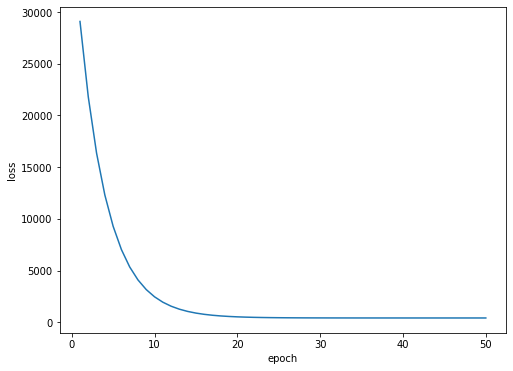

In [ ]:
# fit the model to the train data
lin_reg = Linear_Regression(verbose=True).fit(X_train, y_train)

In [ ]:
print('weights:', lin_reg.weights)
print('bias:', lin_reg.bias.round(10))

weights: [3.32103687]
bias: 0.6544168378


In [ ]:
# make prediction on test data
y_pred = lin_reg.predict(X_test)

## Which r2 score do you expect to be higher? Why?

In [ ]:
# r2 score
print('Test r2 score:', r2_score(y_test, y_pred).round(3))
print('Train r2 score:', r2_score(y_train, lin_reg.predict(X_train)).round(3))

Test r2 score: 0.902
Train r2 score: 0.952


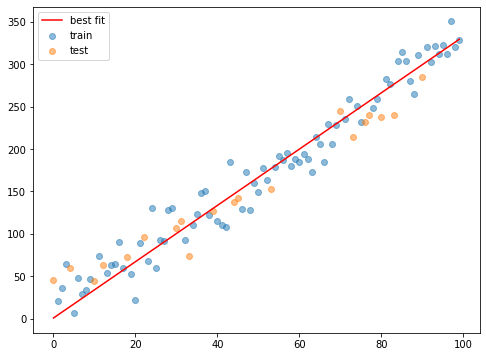

In [ ]:
# plot data
plt.figure(figsize=[8, 6])
plt.scatter(X_train, y_train, alpha=0.5, label='train')
plt.scatter(X_test, y_test, alpha=0.5, label='test')
plt.plot(X, lin_reg.predict(X), color='r', label='best fit')
plt.legend()

## The effect of different learning rates
### Which learning rate would you pick for our model on this particular dataset? Why?

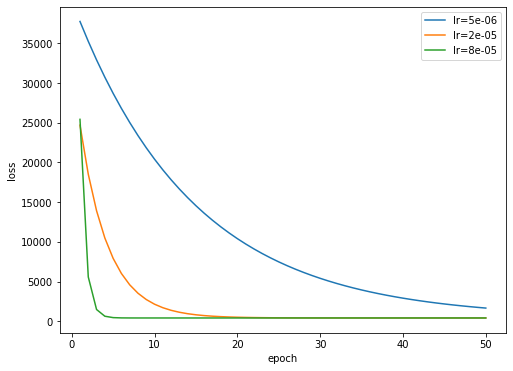

In [ ]:
lr = [0.000005, 0.00002, 0.00008]
plt.figure(figsize=[8, 6])
plt.xlabel('epoch')
plt.ylabel('loss')

for l in lr:
  lin_reg = Linear_Regression(lr=l).fit(X_train, y_train)
  plt.plot(np.arange(1, len(lin_reg.loss_history) + 1), lin_reg.loss_history, label=f'lr={l}')

plt.legend()
plt.show()

## Let's apply our model to a real world dataset (Boston Housing Prices)
Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [ ]:
# load the boston dataset
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# documentation
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = boston.data
y = boston.target

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit on training data (this will take a while to run)
lin_reg2 = Linear_Regression(num_epochs=10**(6), lr=3.2*10**(-6)).fit(X_train, y_train)

## Feel free to try out some other learning rates and see what happens :)

In [ ]:
# predict
y_pred = lin_reg2.predict(X_test)

In [ ]:
# r2 score
print('Test r2 score:', r2_score(y_test, y_pred).round(3))

Test r2 score: 0.612


## Let's compare our model to sklearn's model! (The moment of truth)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print('Test r2 score:', reg.score(X_test, y_test).round(3))

Test r2 score: 0.669


## Not too shabby, eh?
## Next week: Guided Project - Logistic Regression
## Stay tuned!